In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
matplotlib.rcParams.update({'font.size': 16})
from scipy.optimize import curve_fit
import seaborn as sns
import datetime
import matplotlib.ticker as ticker
from scipy.stats import gaussian_kde
import re
from collections import Counter




In [2]:
df = pd.read_csv('/Users/paulfowler/Documents/Spotify_Data/data_master/all_data_total.csv')
df = df.drop('Unnamed: 0', axis=1)
df['release date'] = pd.to_datetime(df['release date'],format='%Y-%m-%d')
df['release_year'] = df['release date'].dt.year

/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.columns)
print(df.dtypes)

Index(['idx', 'album name', 'album id', 'popularity', 'track name', 'track id',
       'explicit', 'artist name', 'artist id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'artist popularity', 'artist genre', 'album popularity', 'release date',
       'label', 'release_year'],
      dtype='object')
idx                         float64
album name                   object
album id                     object
popularity                  float64
track name                   object
track id                     object
explicit                     object
artist name                  object
artist id                    object
danceability                float64
energy                      float64
key                         float64
loudness                    float64
mode                        float64
speechiness                 float64
acousticness   

In [4]:
df = df[df['release date'].dt.year >= 1992]
df['release_year'] = df['release_year'].astype(int)
df.dropna(inplace = True)

In [5]:
grouped_years = df.groupby(['release_year'])
df_grouped = grouped_years.agg(np.median)
df_grouped.reset_index(inplace=True)
df_grouped

release_year      idx  popularity  danceability  energy  key  loudness  \
0           1992  24951.0         4.0         0.510   0.431  5.0  -12.9160   
1           1993  24959.0         5.0         0.508   0.415  5.0  -12.9560   
2           1994  24968.5         5.0         0.514   0.439  5.0  -12.3030   
3           1995  24961.5         7.0         0.516   0.468  5.0  -11.7290   
4           1996  24969.5         8.0         0.528   0.479  5.0  -11.3870   
5           1997  24943.0         9.0         0.514   0.479  5.0  -11.0450   
6           1998  24988.5        10.0         0.529   0.522  5.0   -9.9930   
7           1999  24985.5        12.0         0.554   0.575  5.0   -9.1210   
8           2000  24998.0        12.0         0.552   0.593  5.0   -8.7120   
9           2001  24999.0        14.0         0.558   0.616  5.0   -8.1710   
10          2002  24999.0        15.0         0.563   0.618  5.0   -7.9950   
11          2003  25004.5        16.0         0.553   0.636  5.0   -7.7800   
12          2004  24990.0        17.0         0.555   0.637  5.0   -7.5910   
13          2005  24991.0        20.0         0.563   0.645  5.0   -7.5600   
14          2006  24995.5        20.0         0.562   0.652  5.0   -7.3705   
15          2007  25006.0        21.0         0.559   0.655  5.0   -7.2310   
16          2008  25001.0        22.0         0.551   0.661  5.0   -7.1090   
17          2009  25001.5        24.0         0.562   0.674  5.0   -6.9760   
18          2010  25004.5        26.0         0.556   0.674  5.0   -6.9540   
19          2011  24998.0        27.0         0.546   0.687  5.0   -6.8980   
20          2012  24998.5        29.0         0.560   0.687  5.0   -6.8180   
21          2013  24994.5        31.0         0.562   0.681  5.0   -6.8050   
22          2014  25012.5        34.0         0.574   0.671  5.0   -6.8320   
23          2015  25001.5        37.0         0.584   0.664  5.0   -6.7885   
24          2016  24972.5        41.0         0.599   0.646  5.0   -6.8860   
25          2017  25117.5        43.0         0.611   0.633  5.0   -6.9900   

    mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0    1.0       0.0441         0.561          0.001160    0.1320   0.5000   
1    1.0       0.0436         0.573          0.001440    0.1310   0.4860   
2    1.0       0.0438         0.543          0.001510    0.1310   0.4895   
3    1.0       0.0439         0.478          0.001120    0.1280   0.4970   
4    1.0       0.0443         0.448          0.000943    0.1320   0.5140   
5    1.0       0.0446         0.488          0.001410    0.1300   0.4820   
6    1.0       0.0454         0.404          0.000710    0.1320   0.4990   
7    1.0       0.0455         0.308          0.000246    0.1320   0.5340   
8    1.0       0.0455         0.283          0.000264    0.1310   0.5320   
9    1.0       0.0457         0.243          0.000141    0.1320   0.5340   
10   1.0       0.0457         0.254          0.000137    0.1320   0.5330   
11   1.0       0.0461         0.238          0.000125    0.1350   0.5170   
12   1.0       0.0463         0.234          0.000083    0.1340   0.5130   
13   1.0       0.0469         0.221          0.000062    0.1350   0.5340   
14   1.0       0.0473         0.209          0.000050    0.1330   0.5210   
15   1.0       0.0471         0.205          0.000051    0.1320   0.5090   
16   1.0       0.0457         0.203          0.000055    0.1350   0.4930   
17   1.0       0.0467         0.193          0.000055    0.1340   0.4985   
18   1.0       0.0470         0.174          0.000057    0.1340   0.4830   
19   1.0       0.0479         0.156          0.000092    0.1340   0.4560   
20   1.0       0.0479         0.154          0.000059    0.1320   0.4550   
21   1.0       0.0482         0.147          0.000054    0.1310   0.4370   
22   1.0       0.0484         0.153          0.000042    0.1280   0.4350   
23   1.0       0.0501         0.151          0.000036    0.1280   0.4280 

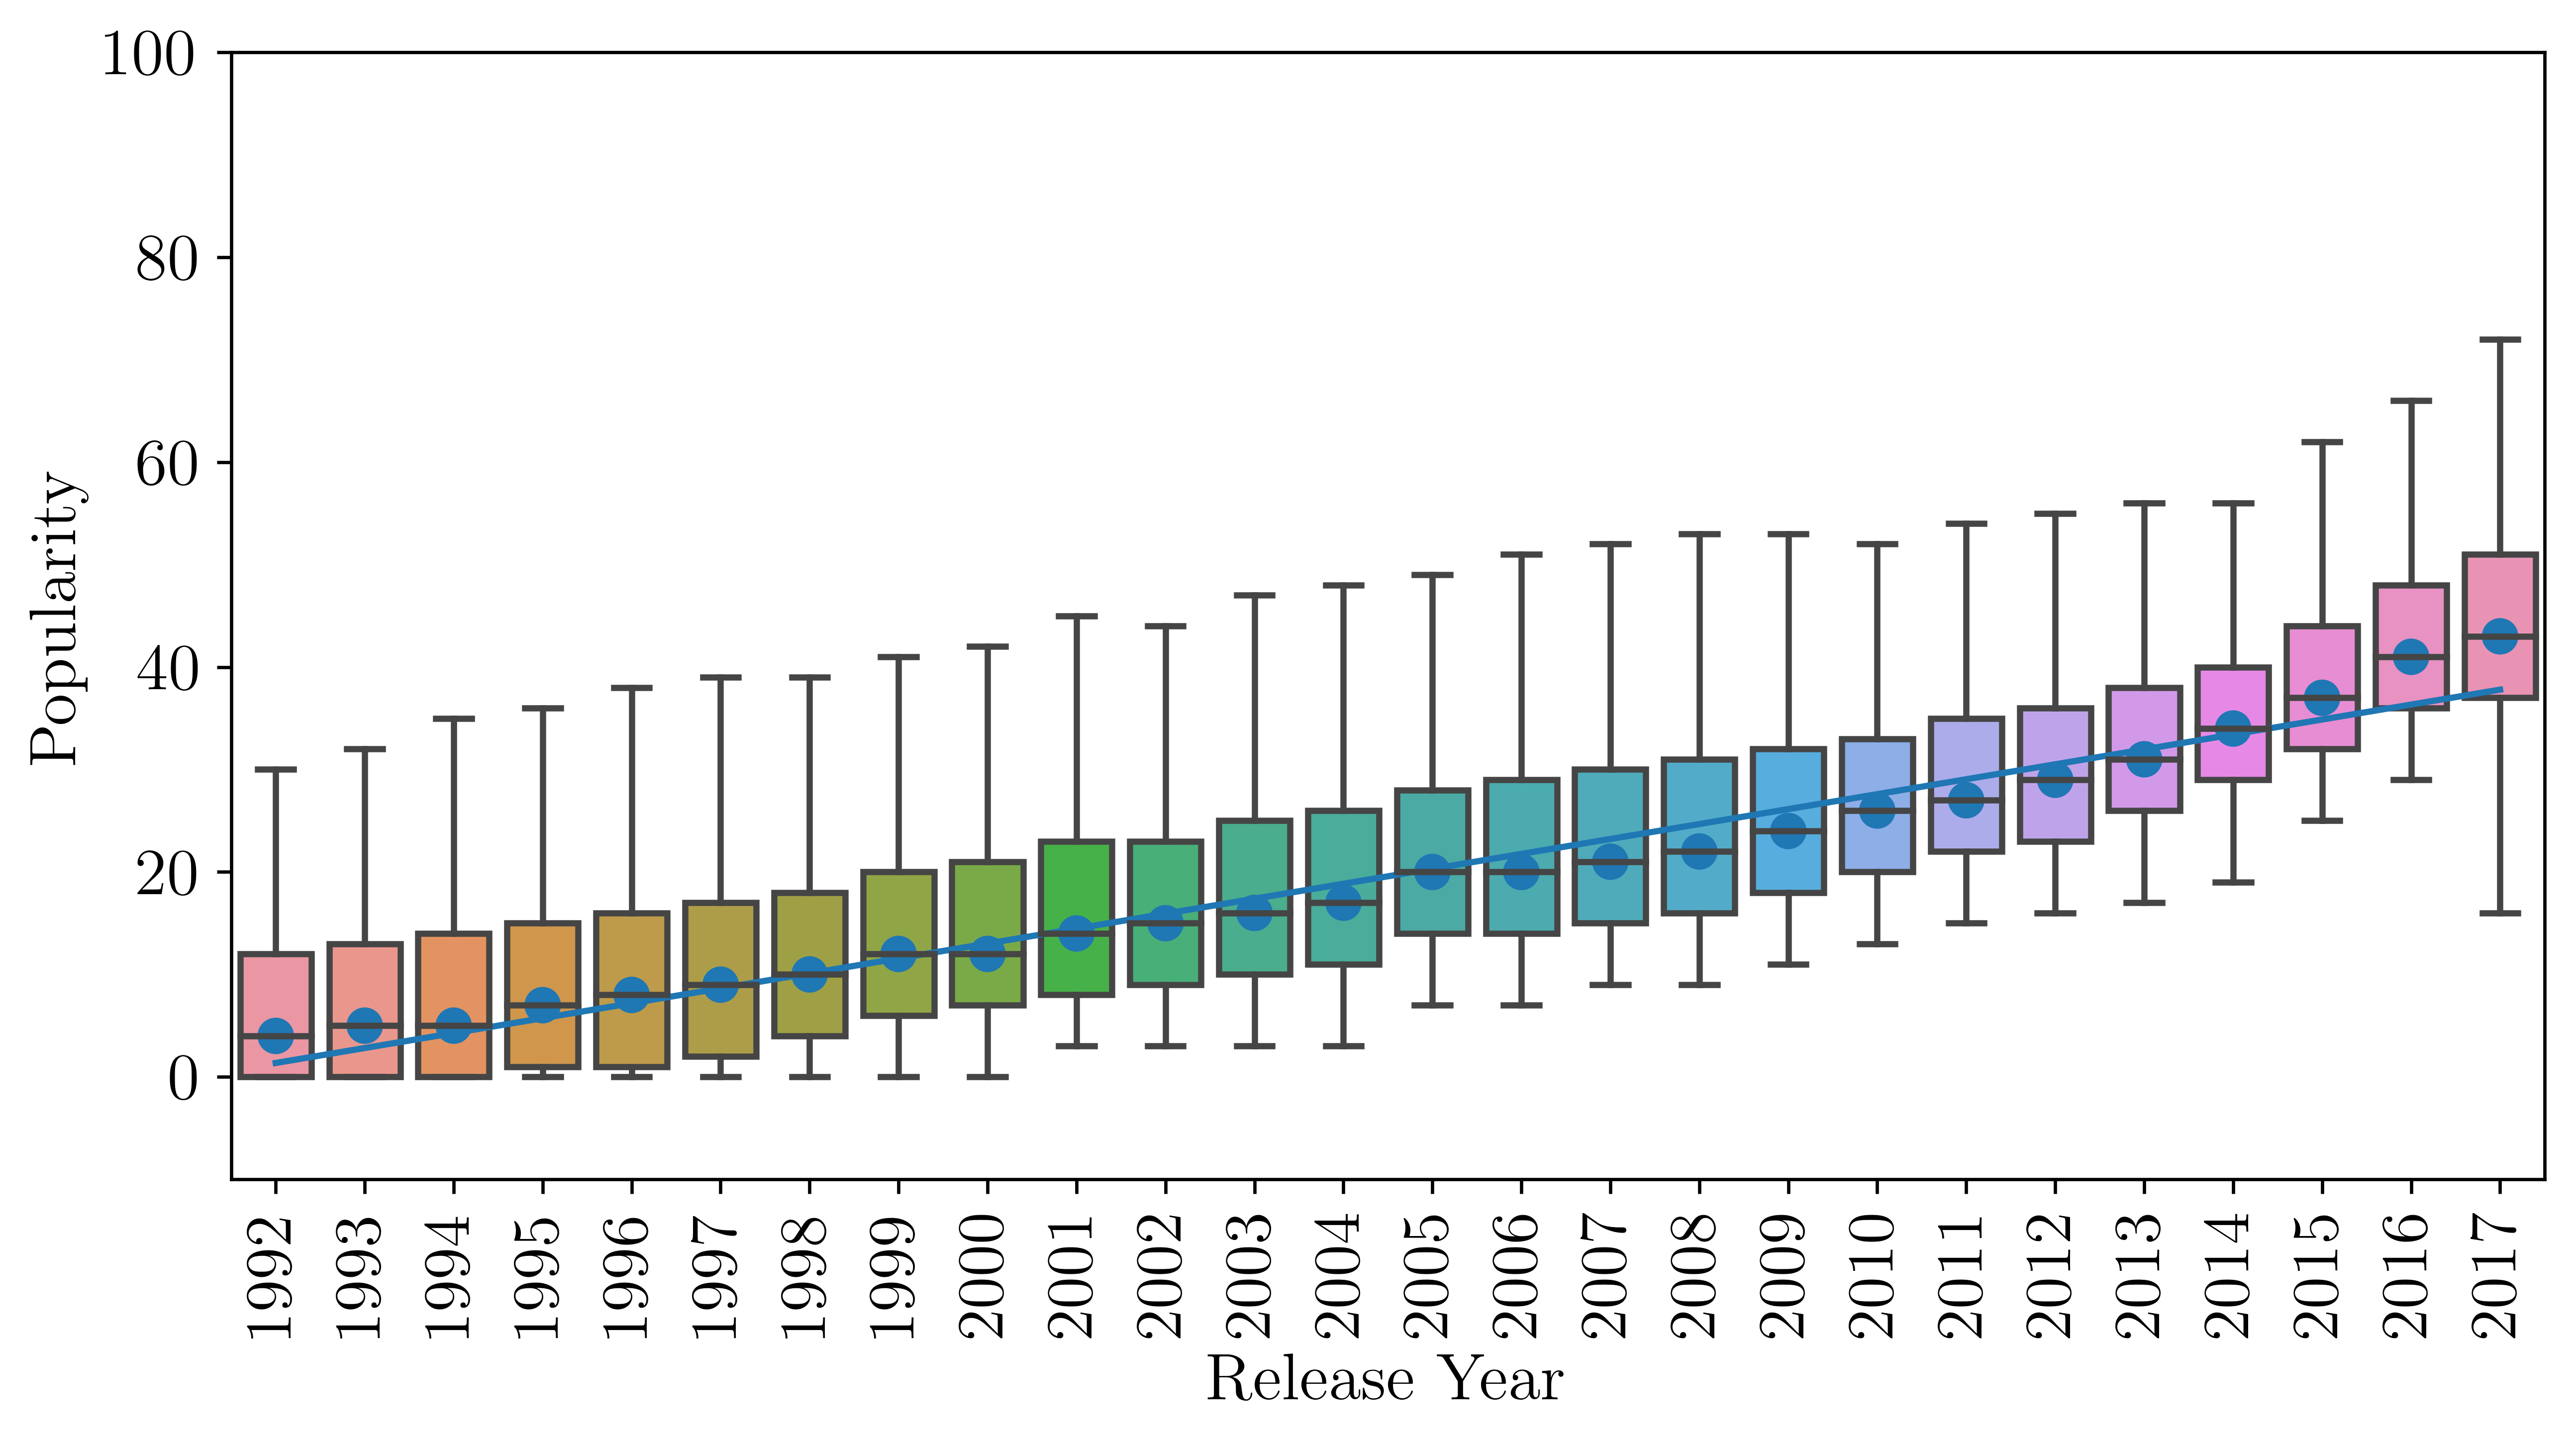

In [6]:
f, ax = plt.subplots(figsize=(10, 5), dpi=600, facecolor='w', edgecolor='k')
pp = sns.pointplot(x="release_year", y="popularity", data= df_grouped,join = False)
g = sns.boxplot(x="release_year", y="popularity", data=df, showfliers=False,ax = ax)
g.set(xlabel = "Release Year", ylabel = "Popularity")
plt.xticks(rotation=90)
plt.ylim(-10, 100)
years = np.arange(1992,2018)
means = np.array(grouped_years['popularity'].agg(np.median))
fit = np.polyfit(years, means, 1)
ax.plot(years.astype('|S5'), fit[0]*years + fit[1], color = sns.color_palette()[0])
plt.show()

In [7]:
names = df_grouped.columns.tolist()
remove_list = ['artist popularity','album popularity','idx','release_year']
cols_to_plot = [i for i in names if i not in remove_list]
print(cols_to_plot)
print(len(cols_to_plot))

ylabels = [i.title() for i in cols_to_plot]
ylabels[-2] = 'Duration (ms)'
ylabels[-1] = 'Time Signature'
print(ylabels)

['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
14
['Popularity', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration (ms)', 'Time Signature']


In [8]:
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

f, ax = plt.subplots(nrows=7, ncols=2,figsize=(10, 20), dpi=600, facecolor='w', edgecolor='k')
axes = ax.flatten()
years = np.arange(1992,2018)
i = 0

for col in cols_to_plot:
    g = sns.boxplot(x="release_year", y=col, data=df, showfliers=False,ax = axes[i])
    g.set(ylabel = ylabels[i])
    g.set(xlabel = 'Release Year')
    #axes[i].set_xticks(axes[i].get_xticks()[::2])
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    means = np.array(grouped_years[col].agg(np.median))
    fit = np.polyfit(years, means, 1)
    axes[i].plot(years.astype('|S5'), fit[0]*years + fit[1], color = sns.color_palette()[0],linewidth = 2)
    i+=1
plt.tight_layout()
#plt.savefig("test.png",format="png")
plt.show()

In [9]:
names = df.columns.tolist()
xs_to_plot = ['danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness',
             'valence','tempo','duration_ms','artist popularity','album popularity','release_year']
xlabels = [i.title() for i in xs_to_plot]
xlabels[xlabels.index('Duration_Ms')] = 'Duration (ms)'
xlabels[xlabels.index('Release_Year')] = 'Release Year'
print(xlabels)
print(len(xlabels))

['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration (ms)', 'Artist Popularity', 'Album Popularity', 'Release Year']
14


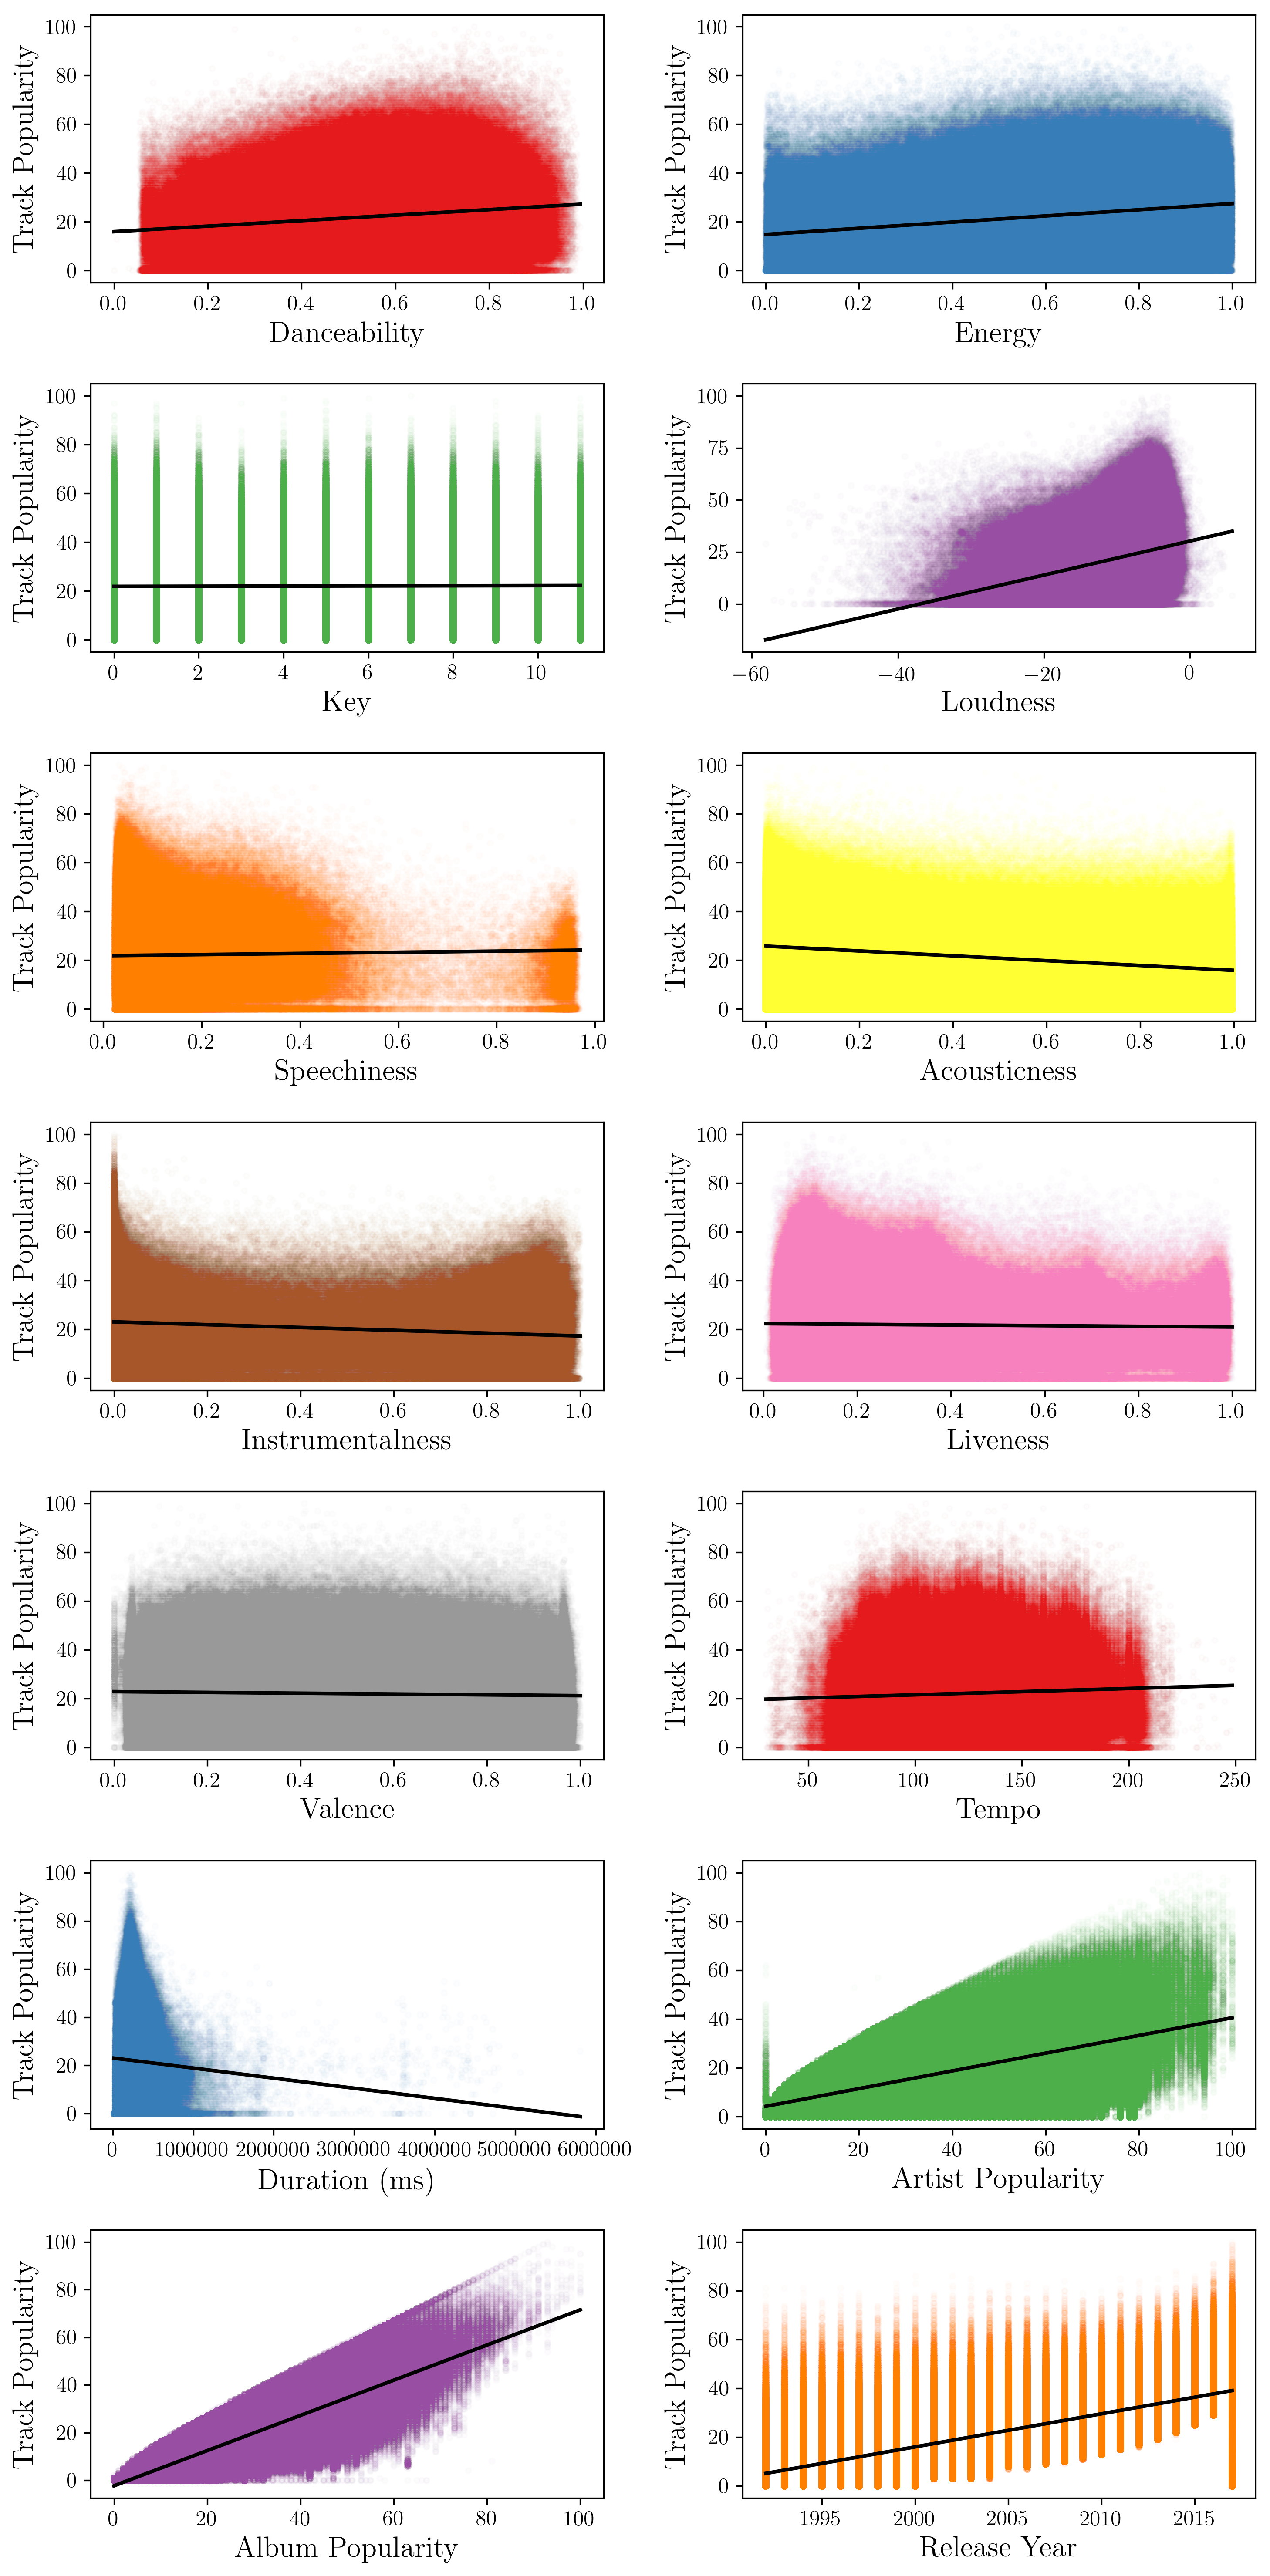

In [10]:
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
palette = sns.color_palette("Set1", 16)
f, ax = plt.subplots(nrows=7, ncols=2,figsize=(10, 20),dpi=300, facecolor='w', edgecolor='k')
axes = ax.flatten()
i = 0
for col in xs_to_plot:
    axes[i].plot(df[col], df['popularity'],'.b',alpha = 0.01, color = palette[i])
    fit = np.polyfit(df[col],df['popularity'], 1)
    xs = np.linspace(df[col].min(), df[col].max(),100)
    axes[i].plot(xs, fit[0]*xs + fit[1], '-k',linewidth = 2)
    axes[i].set(ylabel = 'Track Popularity')
    axes[i].set(xlabel = xlabels[i])
    i+=1
plt.tight_layout()
#plt.savefig("popularity.png",format="png")
plt.show()

In [11]:
df['explicit'] = df['explicit'].astype(int)
df['duration_s'] = df['duration_ms']/1000
names = df.columns.tolist()
remove_list = ['idx','release_year','album name','album id','track name','track id','artist name','artist id',
              'artist genre','release date','label','valence','duration_ms']
cols_to_plot = [i for i in names if i not in remove_list]
#print(cols_to_plot)
#print(len(cols_to_plot))

xlabels = [i.title() for i in cols_to_plot]
xlabels[xlabels.index('Duration_S')] = 'Duration (s)'
xlabels[xlabels.index('Time_Signature')] = 'Time Signature'
print(xlabels)


['Popularity', 'Explicit', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo', 'Time Signature', 'Artist Popularity', 'Album Popularity', 'Duration (s)']


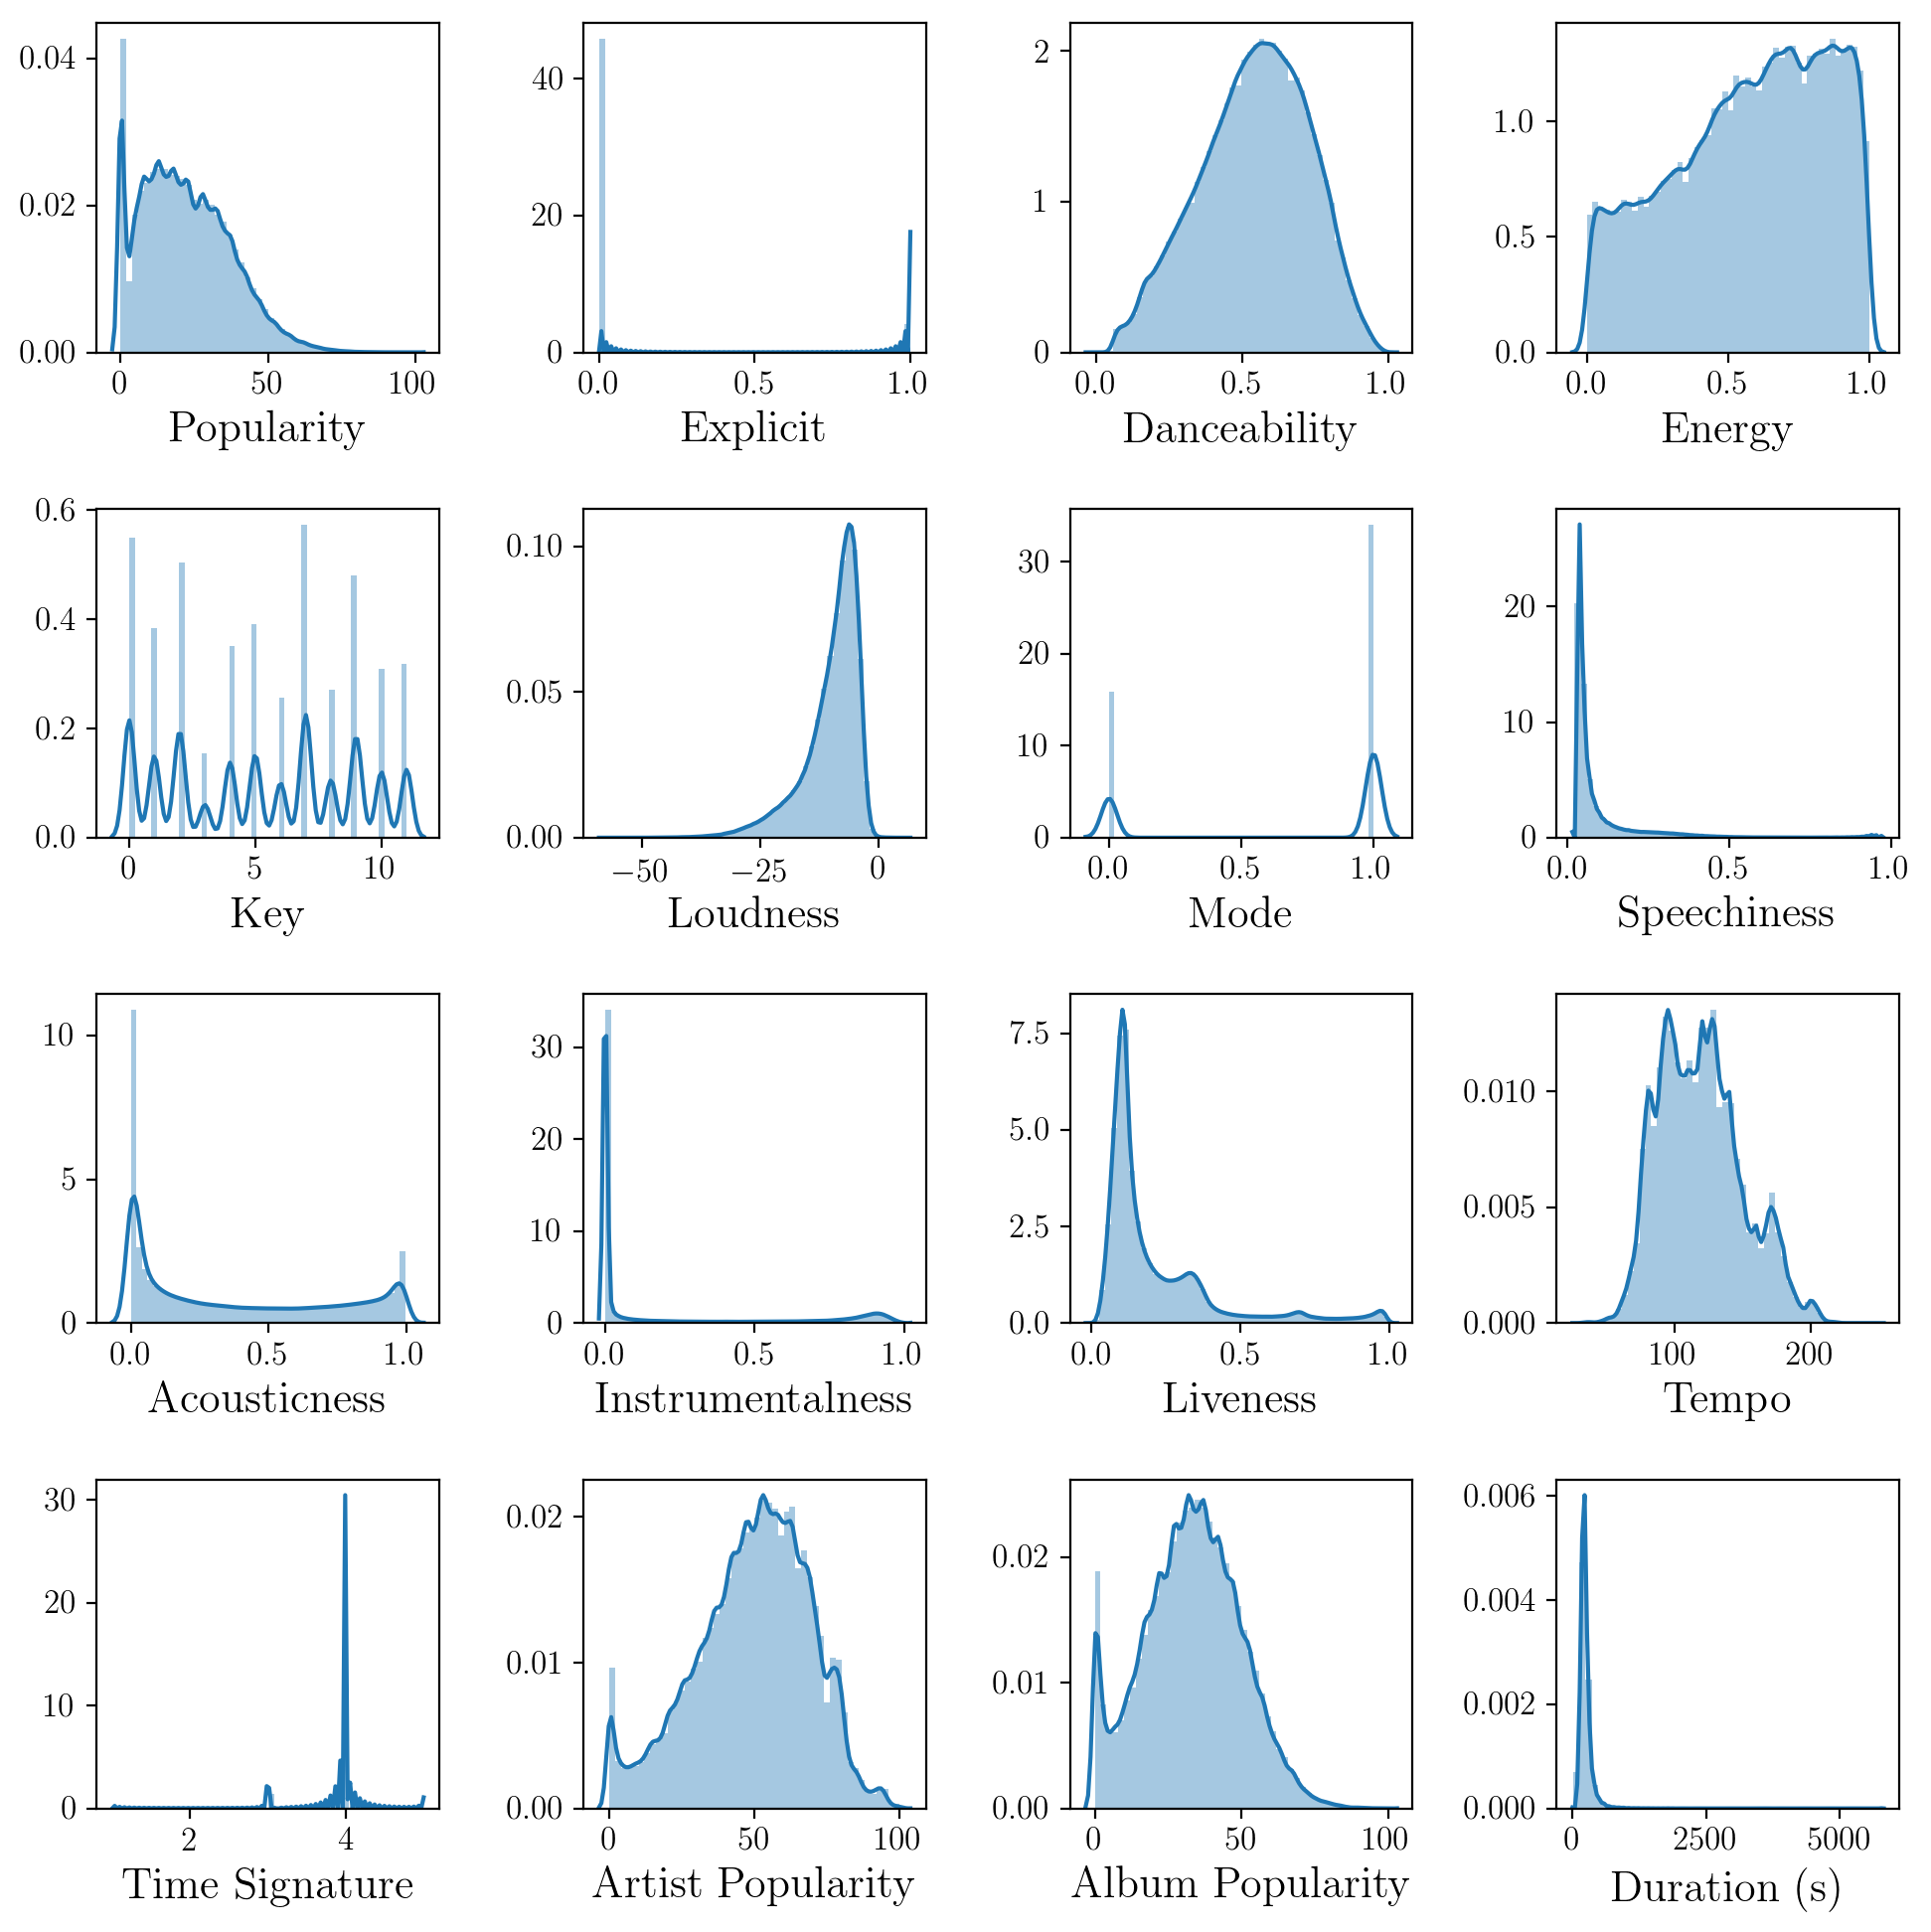

In [12]:
f, ax = plt.subplots(nrows=4, ncols=4,figsize=(10,10), dpi=200, facecolor='w', edgecolor='k')
axes = ax.flatten()
i = 0
for col in cols_to_plot:
    g = sns.distplot(df[col], ax = axes[i],kde = True, norm_hist = True)
    g.set(xlabel = xlabels[i])
    i+=1

plt.tight_layout()
plt.savefig("distributions.png",format="png")
plt.show()

In [13]:
df_genres = df[(df['artist genre']!='[]')].reset_index()

In [14]:
def get_genre(text):
    text = text[1:-1]
    genre = re.sub("[^a-zA-Z0-9]"," ",text).lower().split()
    wordcount = Counter(genre)
    sorted_genres = sorted(wordcount, key=wordcount.get, reverse=True)
    return sorted_genres[0]

In [15]:
df_genres['genre_simple'] = df_genres['artist genre'].apply(get_genre)


In [16]:
df_genres.loc[df_genres['genre_simple'] == 'hip', 'genre_simple'] = 'hip hop'
df_genres.loc[df_genres['genre_simple'] == 'R and B', 'genre_simple'] = 'R&B'
df_genres['genre_simple'] = df_genres['genre_simple'].str.title()

In [17]:
s = df_genres['genre_simple'].value_counts().nlargest(25)
df_temp = pd.DataFrame({'genre_simple':s.index}).merge(df_genres, how='left')
grouped_genres = df_temp.groupby(['genre_simple'])
df_grouped = grouped_genres.agg(np.mean)

In [18]:
df_grouped = df_grouped.reindex(index = df_genres["genre_simple"].value_counts().index).head(25)

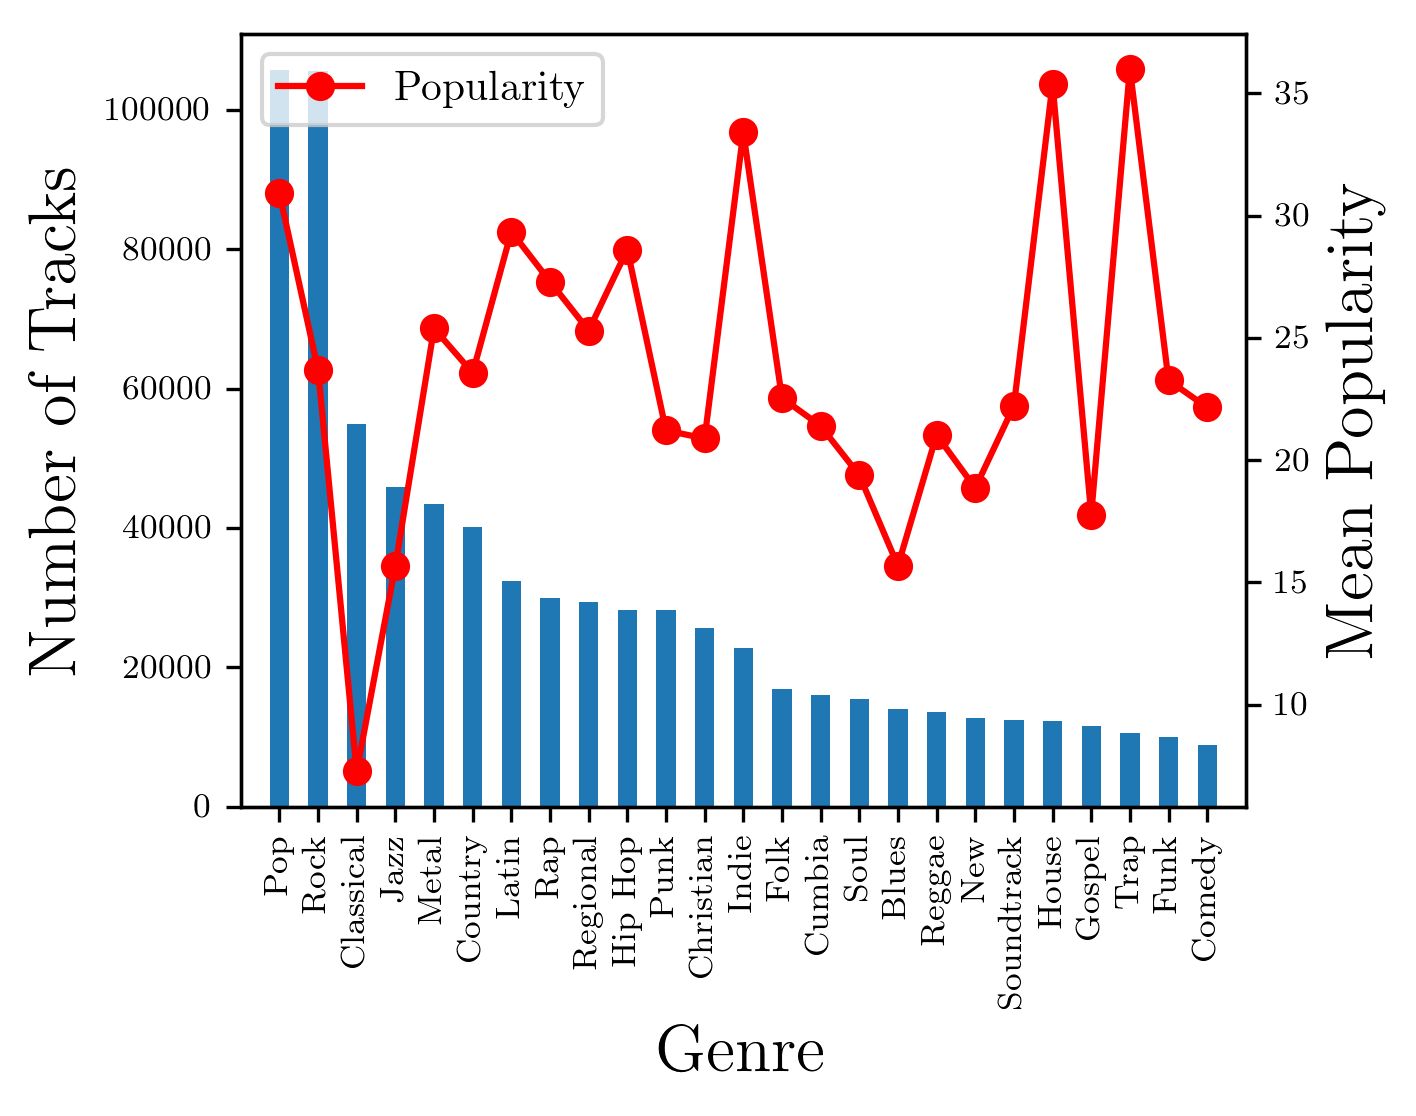

In [19]:
matplotlib.rcParams['xtick.labelsize'] = 8
matplotlib.rcParams['ytick.labelsize'] = 8
f, ax = plt.subplots(figsize=(5, 4), dpi=300, facecolor='w', edgecolor='k')

pd.value_counts(df_genres['genre_simple'])[0:25].plot.bar()
ax.set_ylabel('Number of Tracks')
df_grouped.plot(y='popularity', use_index=True, style = '-o',color='red',ax=ax,secondary_y=True, mark_right=False,label = 'Popularity')
ax.set_xlabel("Genre")
ax.right_ax.set_ylabel('Mean Popularity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend_.remove()
plt.legend(loc='upper left',fontsize=10)
ax.set_xlim(-1,25) #(ax.get_xlim())
plt.tight_layout()
#plt.savefig("tracks.png",format="png")
plt.show()

## Genre count for years plot

In [20]:
s = df_genres['genre_simple'].value_counts().nlargest(10)
df_temp = pd.DataFrame({'genre_simple':s.index}).merge(df_genres, how='left')
grouped = df_temp.groupby(['release_year','genre_simple'])
grouped.size()

release_year  genre_simple
1992          Classical       6072
              Country          873
              Hip Hop          502
              Jazz            2872
              Latin            844
              Metal            775
              Pop             1911
              Rap              310
              Regional         379
              Rock            4871
1993          Classical       6562
              Country         1256
              Hip Hop          589
              Jazz            2495
              Latin            523
              Metal            985
              Pop             1745
              Rap              400
              Regional         333
              Rock            5055
1994          Classical       6824
              Country         1400
              Hip Hop          682
              Jazz            2653
              Latin            691
              Metal            967
              Pop             1912
              Rap           

In [21]:
genre_by_year = df_temp.pivot_table(index=['release_year'], columns='genre_simple', aggfunc='size', fill_value=0)

In [22]:
genre_by_year

genre_simple  Classical  Country  Hip Hop  Jazz  Latin  Metal   Pop   Rap  \
release_year                                                                
1992               6072      873      502  2872    844    775  1911   310   
1993               6562     1256      589  2495    523    985  1745   400   
1994               6824     1400      682  2653    691    967  1912   470   
1995               5260     1520      705  2949    579   1004  2192   577   
1996               3710     1610      699  2815    942   1108  1834   551   
1997               7071     1436      701  2514    865   1233  1850   502   
1998               4494     1554     1107  2730   1016   1412  2104   769   
1999               1774     1437     1283  2485   1089   1707  2456   881   
2000               1647     1849     1113  2686    885   1997  2918   839   
2001               1004     1537     1255  1925   1313   2145  2958  1194   
2002               1158     1828      993  2637   1567   2133  3328  1127   
2003               1211     1663     1072  2110   1664   2570  4231  1326   
2004                949     1794     1505  1843   1802   2412  3809  1412   
2005                826     1915     1440  2208   1324   2216  4448  1426   
2006                677     1847      998  1750   1887   2081  4527  1970   
2007                613     1501      980  1454   1783   2442  4734  1616   
2008                557     1792      840  1296   1557   2226  5112  1226   
2009                497     1398     1005  1408   1865   2282  5826  1319   
2010                518     1744      811   997   1473   2056  6044  1404   
2011                450     1380      953   890   1345   2135  5947  1566   
2012                353     1521     1046   874   1798   1802  6235  1393   
2013                355     1695     1106   746   1330   1617  6692  1736   
2014                307     1668     1232   654   1267   1451  6262  1395   
2015                388     1503     1512   394   1403   1151  6084  1818   
2016                126     1306     2085   240    898    985  5585  1503   
2017               1495     1166     2030   201    680    540  4921  1278   

genre_simple  Regional  Rock  
release_year                  
1992               379  4871  
1993               333  5055  
1994               430  4156  
1995               612  4798  
1996               400  4545  
1997               559  4480  
1998               737  4332  
1999              1237  4341  
2000               755  4625  
2001              1382  4947  
2002              1390  5046  
2003               973  5345  
2004               860  5004  
2005               956  5450  
2006              1029  4640  
2007              1258  4587  
2008              1267  4527  
2009              1655  4209  
2010              1724  3596  
2011              1031  3853  
2012              1632  2695  
2013              1400  3038  
2014              2030  2421  
2015              1915  1835  
2016              1919  1517  
2017              1468  1712

In [471]:
#genre_by_year.to_csv('genres_by_year.csv')

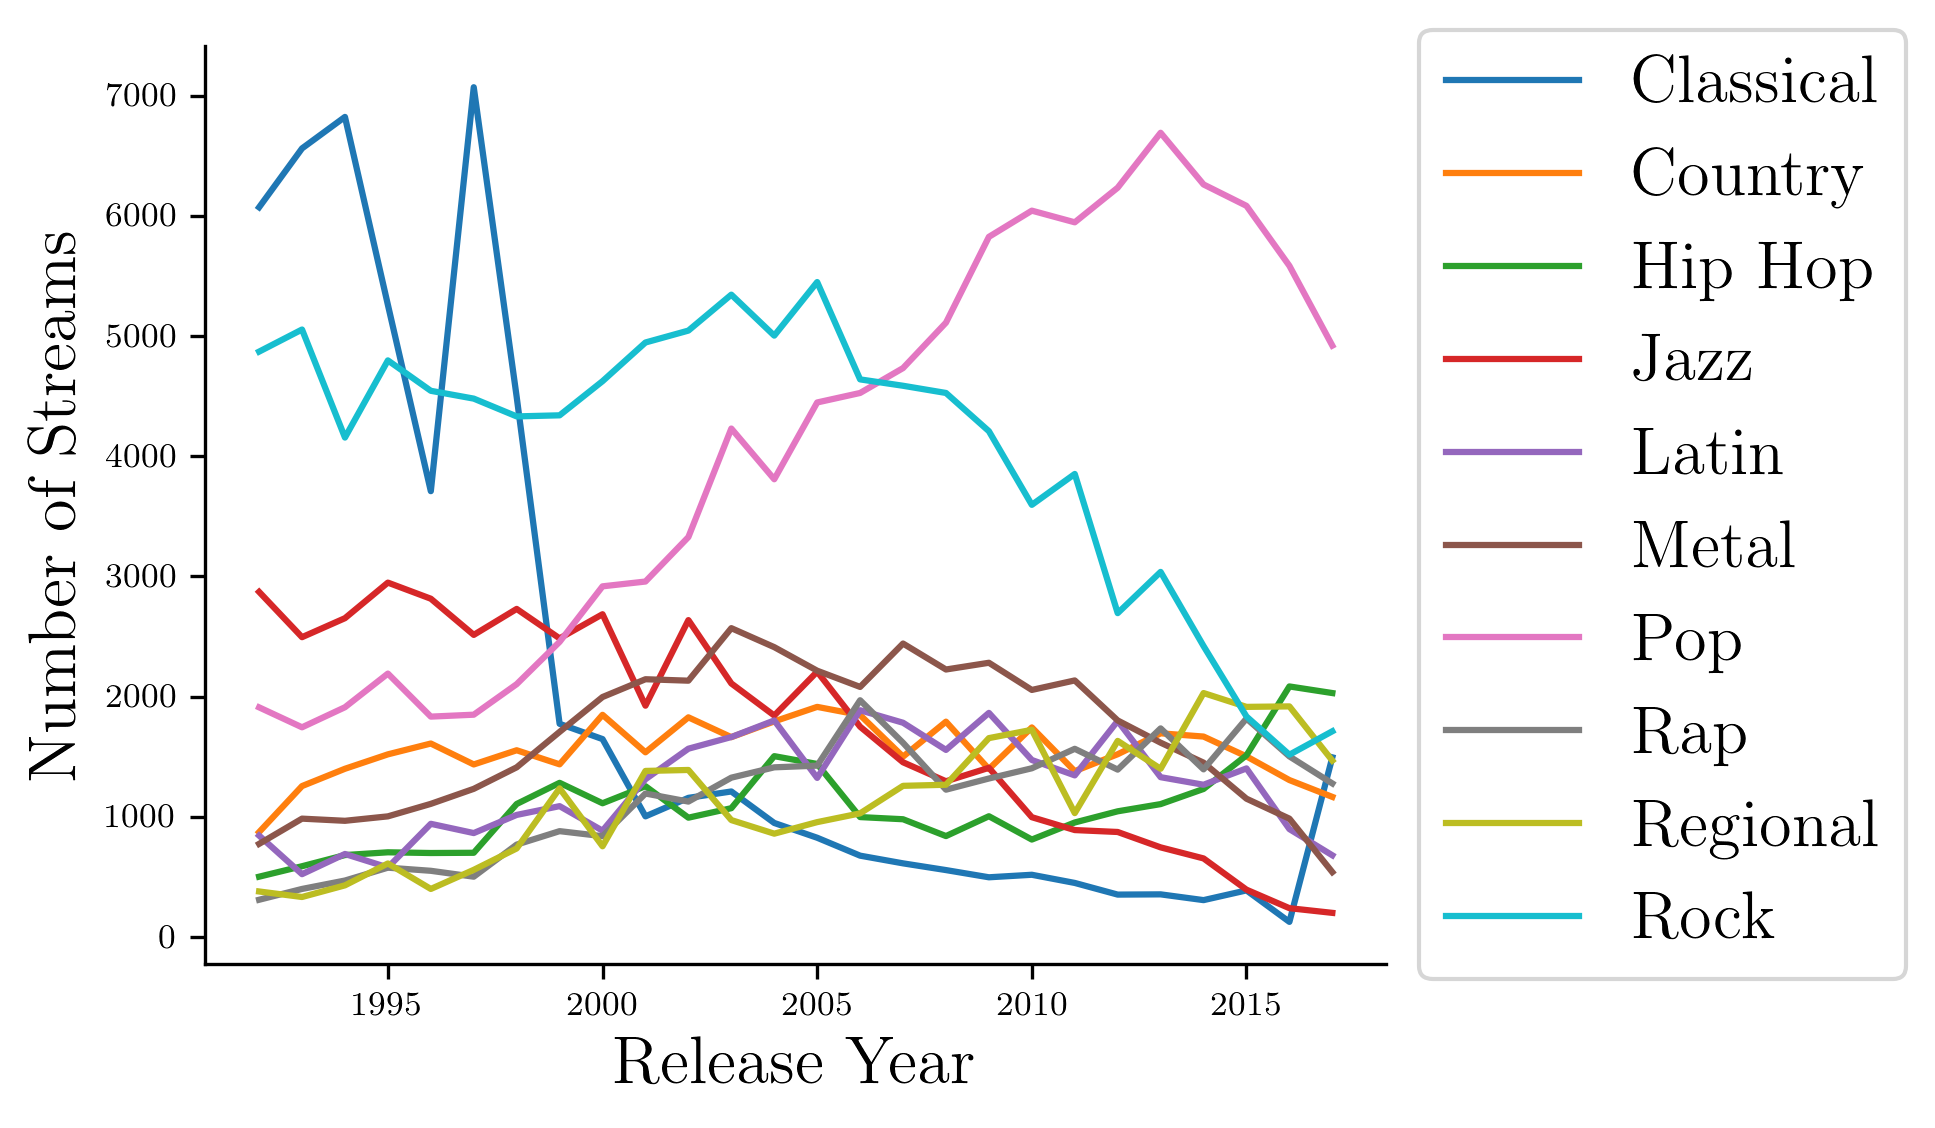

In [23]:
f, ax = plt.subplots(figsize=(5, 4), dpi=300, facecolor='w', edgecolor='k')
years = np.arange(1992,2018)
for col in genre_by_year.columns:
    ax.plot(years,genre_by_year[col],label = col)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of Streams')
ax.set_xlabel('Release Year')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig("genres_year.png",format="png")
plt.show()